# ML-model initialisation and execution

In [1]:
from copro import utils, pipeline, evaluation, plots, machine_learning

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sbs
import os, sys
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")

For better reproducibility, the version numbers of all key packages are provided.

In [2]:
utils.show_versions()

Python version: 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 01:53:57) [MSC v.1916 64 bit (AMD64)]
copro version: 0.0.6b
geopandas version: 0.8.0
xarray version: 0.15.1
rasterio version: 1.1.0
pandas version: 1.0.3
numpy version: 1.18.1
scikit-learn version: 0.23.2
matplotlib version: 3.2.1
seaborn version: 0.11.0
rasterstats version: 0.14.0


## Read pre-computed XY-data

In the cfg-file, all the settings for the analysis are defined. By 'parsing' (i.e. reading) it, all settings and file paths are known to the model. This is a simple way to make the code independent of the input data and settings.

In [3]:
settings_file = 'example_settings.cfg'

Based on this cfg-file, the set-up of the run can be initialized. One part of the cfg-file is the specification and creation of an output folder.

In [4]:
config, out_dir = utils.initiate_setup(settings_file)

INFO: saving output to folder C:\Users\hoch0001\Documents\_code\copro\example\OUT
INFO: no conflict file was specified, hence downloading data from http://ucdp.uu.se/downloads/ged/ged201-csv.zip to C:\Users\hoch0001\Documents\_code\copro\example\example_data\UCDP\ged201-csv.zip


Since no XY-data is specified in the config-file initially, we have to set this manually.

In [5]:
config.set('pre_calc', 'XY', str(os.path.join(os.path.abspath(config.get('general', 'output_dir')), 'XY.npy')))

See if the right path pops up:

In [6]:
config.get('pre_calc', 'XY')

'C:\\Users\\hoch0001\\Documents\\_code\\copro\\example\\OUT\\XY.npy'

Now that this is taken care of, we also need to load in the data from the very first notebook.

In [7]:
conflict_gdf = gpd.read_file(os.path.join(out_dir, 'selected_conflicts.shp'))
selected_polygons_gdf = gpd.read_file(os.path.join(out_dir, 'selected_polygons.shp'))

Again, for the conversion from numpy array to dataframe this requires a few more steps.

In [8]:
global_arr = np.load(os.path.join(out_dir, 'global_df.npy'), allow_pickle=True)
global_df = pd.DataFrame(data=global_arr, columns=['geometry', 'ID'])
global_df.set_index(global_df.ID, inplace=True)
global_df.drop(['ID'] , axis=1, inplace=True)

The scence is set now and we can compute the X-array and Y-array in no time!

In [9]:
X, Y = pipeline.create_XY(config, selected_polygons_gdf, conflict_gdf, )

INFO: loading XY data from file C:\Users\hoch0001\Documents\_code\copro\example\OUT\XY.npy
DEBUG: number of data points including missing values: 4384
DEBUG: number of data points excluding missing values: 4272
DEBUG: a fraction of 15.94 percent in the data corresponds to conflicts.


## Scaler and classifier

In [10]:
scaler, clf = pipeline.prepare_ML(config)

DEBUG: chosen scaling method is QuantileTransformer()
DEBUG: chosen ML model is RandomForestClassifier(class_weight={1: 100}, n_estimators=1000)


## Output initialization

Since the model is run multiple times, we need to initialize some stuff first to append the output per run.

In [11]:
out_X_df = evaluation.init_out_df()
out_y_df = evaluation.init_out_df()

In [12]:
out_dict = evaluation.init_out_dict()

In [13]:
trps, aucs, mean_fpr = evaluation.init_out_ROC_curve()

## ML-model execution

The pudels kern! This is where the magic happens, and not only once. Due make sure that any conincidental results are ruled out, we run the model multiple times. Thereby, always different samples are used for training and prediction. By using a sufficient number of runs and averaging the overall results, we should be able to get a good picture of what the model is capable of.

The main evaluation metric is the mean ROC-score and [**ROC-curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html), plotted at the end of all runs.

INFO: run 1 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.596
Recall: 0.273
F1 score: 0.375
Brier loss score: 0.110
Cohen-Kappa score: 0.301
ROC AUC score 0.829


No handles with labels found to put in legend.


INFO: run 2 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.839
Precision: 0.457
Recall: 0.270
F1 score: 0.340
Brier loss score: 0.108
Cohen-Kappa score: 0.255
ROC AUC score 0.819


No handles with labels found to put in legend.


INFO: run 3 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.853
Precision: 0.548
Recall: 0.258
F1 score: 0.351
Brier loss score: 0.106
Cohen-Kappa score: 0.279
ROC AUC score 0.828


No handles with labels found to put in legend.


INFO: run 4 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.841
Precision: 0.581
Recall: 0.276
F1 score: 0.374
Brier loss score: 0.112
Cohen-Kappa score: 0.296
ROC AUC score 0.828


No handles with labels found to put in legend.


INFO: run 5 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.853
Precision: 0.541
Recall: 0.299
F1 score: 0.386
Brier loss score: 0.108
Cohen-Kappa score: 0.310
ROC AUC score 0.806


No handles with labels found to put in legend.


INFO: run 6 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.856
Precision: 0.548
Recall: 0.238
F1 score: 0.332
Brier loss score: 0.103
Cohen-Kappa score: 0.265
ROC AUC score 0.827


No handles with labels found to put in legend.


INFO: run 7 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.560
Recall: 0.244
F1 score: 0.340
Brier loss score: 0.114
Cohen-Kappa score: 0.268
ROC AUC score 0.814


No handles with labels found to put in legend.


INFO: run 8 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.851
Precision: 0.563
Recall: 0.284
F1 score: 0.378
Brier loss score: 0.109
Cohen-Kappa score: 0.303
ROC AUC score 0.814


No handles with labels found to put in legend.


INFO: run 9 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.845
Precision: 0.547
Recall: 0.278
F1 score: 0.368
Brier loss score: 0.113
Cohen-Kappa score: 0.290
ROC AUC score 0.813


No handles with labels found to put in legend.


INFO: run 10 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.856
Precision: 0.574
Recall: 0.290
F1 score: 0.385
Brier loss score: 0.106
Cohen-Kappa score: 0.314
ROC AUC score 0.832


No handles with labels found to put in legend.


INFO: run 11 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.851
Precision: 0.551
Recall: 0.216
F1 score: 0.310
Brier loss score: 0.105
Cohen-Kappa score: 0.244
ROC AUC score 0.833


No handles with labels found to put in legend.


INFO: run 12 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.835
Precision: 0.526
Recall: 0.230
F1 score: 0.321
Brier loss score: 0.118
Cohen-Kappa score: 0.242
ROC AUC score 0.818


No handles with labels found to put in legend.


INFO: run 13 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.849
Precision: 0.546
Recall: 0.261
F1 score: 0.353
Brier loss score: 0.111
Cohen-Kappa score: 0.280
ROC AUC score 0.814


No handles with labels found to put in legend.


INFO: run 14 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.850
Precision: 0.515
Recall: 0.262
F1 score: 0.347
Brier loss score: 0.109
Cohen-Kappa score: 0.272
ROC AUC score 0.803


No handles with labels found to put in legend.


INFO: run 15 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.851
Precision: 0.562
Recall: 0.307
F1 score: 0.397
Brier loss score: 0.105
Cohen-Kappa score: 0.321
ROC AUC score 0.843


No handles with labels found to put in legend.


INFO: run 16 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.843
Precision: 0.491
Recall: 0.271
F1 score: 0.350
Brier loss score: 0.110
Cohen-Kappa score: 0.269
ROC AUC score 0.815


No handles with labels found to put in legend.


INFO: run 17 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.855
Precision: 0.514
Recall: 0.286
F1 score: 0.367
Brier loss score: 0.107
Cohen-Kappa score: 0.293
ROC AUC score 0.802


No handles with labels found to put in legend.


INFO: run 18 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.854
Precision: 0.550
Recall: 0.308
F1 score: 0.395
Brier loss score: 0.102
Cohen-Kappa score: 0.319
ROC AUC score 0.841


No handles with labels found to put in legend.


INFO: run 19 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.851
Precision: 0.519
Recall: 0.287
F1 score: 0.370
Brier loss score: 0.106
Cohen-Kappa score: 0.293
ROC AUC score 0.831


No handles with labels found to put in legend.


INFO: run 20 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.853
Precision: 0.576
Recall: 0.279
F1 score: 0.376
Brier loss score: 0.105
Cohen-Kappa score: 0.304
ROC AUC score 0.826


No handles with labels found to put in legend.


INFO: run 21 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.848
Precision: 0.565
Recall: 0.292
F1 score: 0.385
Brier loss score: 0.107
Cohen-Kappa score: 0.308
ROC AUC score 0.831


No handles with labels found to put in legend.


INFO: run 22 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.854
Precision: 0.539
Recall: 0.282
F1 score: 0.370
Brier loss score: 0.108
Cohen-Kappa score: 0.297
ROC AUC score 0.802


No handles with labels found to put in legend.


INFO: run 23 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.841
Precision: 0.562
Recall: 0.250
F1 score: 0.346
Brier loss score: 0.115
Cohen-Kappa score: 0.271
ROC AUC score 0.815


No handles with labels found to put in legend.


INFO: run 24 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.509
Recall: 0.275
F1 score: 0.357
Brier loss score: 0.110
Cohen-Kappa score: 0.278
ROC AUC score 0.804


No handles with labels found to put in legend.


INFO: run 25 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.829
Precision: 0.559
Recall: 0.247
F1 score: 0.342
Brier loss score: 0.119
Cohen-Kappa score: 0.261
ROC AUC score 0.821


No handles with labels found to put in legend.


INFO: run 26 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.850
Precision: 0.631
Recall: 0.297
F1 score: 0.404
Brier loss score: 0.111
Cohen-Kappa score: 0.331
ROC AUC score 0.831


No handles with labels found to put in legend.


INFO: run 27 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.583
Recall: 0.231
F1 score: 0.331
Brier loss score: 0.112
Cohen-Kappa score: 0.262
ROC AUC score 0.810


No handles with labels found to put in legend.


INFO: run 28 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.835
Precision: 0.582
Recall: 0.233
F1 score: 0.333
Brier loss score: 0.116
Cohen-Kappa score: 0.258
ROC AUC score 0.837


No handles with labels found to put in legend.


INFO: run 29 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.533
Recall: 0.275
F1 score: 0.362
Brier loss score: 0.107
Cohen-Kappa score: 0.285
ROC AUC score 0.832


No handles with labels found to put in legend.


INFO: run 30 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.857
Precision: 0.568
Recall: 0.276
F1 score: 0.371
Brier loss score: 0.099
Cohen-Kappa score: 0.301
ROC AUC score 0.854


No handles with labels found to put in legend.


INFO: run 31 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.854
Precision: 0.590
Recall: 0.243
F1 score: 0.344
Brier loss score: 0.105
Cohen-Kappa score: 0.278
ROC AUC score 0.836


No handles with labels found to put in legend.


INFO: run 32 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.855
Precision: 0.602
Recall: 0.312
F1 score: 0.411
Brier loss score: 0.109
Cohen-Kappa score: 0.338
ROC AUC score 0.826


No handles with labels found to put in legend.


INFO: run 33 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.826
Precision: 0.520
Recall: 0.225
F1 score: 0.314
Brier loss score: 0.118
Cohen-Kappa score: 0.232
ROC AUC score 0.820


No handles with labels found to put in legend.


INFO: run 34 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.843
Precision: 0.682
Recall: 0.250
F1 score: 0.366
Brier loss score: 0.117
Cohen-Kappa score: 0.298
ROC AUC score 0.828


No handles with labels found to put in legend.


INFO: run 35 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.839
Precision: 0.561
Recall: 0.251
F1 score: 0.347
Brier loss score: 0.116
Cohen-Kappa score: 0.270
ROC AUC score 0.813


No handles with labels found to put in legend.


INFO: run 36 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.848
Precision: 0.538
Recall: 0.276
F1 score: 0.365
Brier loss score: 0.107
Cohen-Kappa score: 0.288
ROC AUC score 0.824


No handles with labels found to put in legend.


INFO: run 37 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.853
Precision: 0.551
Recall: 0.296
F1 score: 0.386
Brier loss score: 0.107
Cohen-Kappa score: 0.311
ROC AUC score 0.818


No handles with labels found to put in legend.


INFO: run 38 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.835
Precision: 0.579
Recall: 0.243
F1 score: 0.343
Brier loss score: 0.117
Cohen-Kappa score: 0.266
ROC AUC score 0.823


No handles with labels found to put in legend.


INFO: run 39 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.850
Precision: 0.587
Recall: 0.260
F1 score: 0.360
Brier loss score: 0.107
Cohen-Kappa score: 0.289
ROC AUC score 0.834


No handles with labels found to put in legend.


INFO: run 40 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.843
Precision: 0.551
Recall: 0.233
F1 score: 0.328
Brier loss score: 0.115
Cohen-Kappa score: 0.255
ROC AUC score 0.805


No handles with labels found to put in legend.


INFO: run 41 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.509
Recall: 0.281
F1 score: 0.362
Brier loss score: 0.108
Cohen-Kappa score: 0.283
ROC AUC score 0.821


No handles with labels found to put in legend.


INFO: run 42 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.848
Precision: 0.540
Recall: 0.233
F1 score: 0.325
Brier loss score: 0.108
Cohen-Kappa score: 0.255
ROC AUC score 0.831


No handles with labels found to put in legend.


INFO: run 43 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.842
Precision: 0.526
Recall: 0.246
F1 score: 0.336
Brier loss score: 0.109
Cohen-Kappa score: 0.259
ROC AUC score 0.827


No handles with labels found to put in legend.


INFO: run 44 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.860
Precision: 0.684
Recall: 0.258
F1 score: 0.375
Brier loss score: 0.104
Cohen-Kappa score: 0.314
ROC AUC score 0.845


No handles with labels found to put in legend.


INFO: run 45 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.832
Precision: 0.490
Recall: 0.224
F1 score: 0.308
Brier loss score: 0.119
Cohen-Kappa score: 0.227
ROC AUC score 0.804


No handles with labels found to put in legend.


INFO: run 46 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.832
Precision: 0.512
Recall: 0.202
F1 score: 0.289
Brier loss score: 0.117
Cohen-Kappa score: 0.214
ROC AUC score 0.811


No handles with labels found to put in legend.


INFO: run 47 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.846
Precision: 0.583
Recall: 0.232
F1 score: 0.332
Brier loss score: 0.109
Cohen-Kappa score: 0.263
ROC AUC score 0.827


No handles with labels found to put in legend.


INFO: run 48 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.841
Precision: 0.551
Recall: 0.301
F1 score: 0.389
Brier loss score: 0.120
Cohen-Kappa score: 0.307
ROC AUC score 0.788


No handles with labels found to put in legend.


INFO: run 49 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.855
Precision: 0.532
Recall: 0.301
F1 score: 0.384
Brier loss score: 0.109
Cohen-Kappa score: 0.309
ROC AUC score 0.805


No handles with labels found to put in legend.


INFO: run 50 of 50
INFO: using all data
DEBUG: fitting and transforming X
DEBUG: splitting both X and Y in train and test data
Accuracy: 0.844
Precision: 0.547
Recall: 0.249
F1 score: 0.342
Brier loss score: 0.111
Cohen-Kappa score: 0.267
ROC AUC score 0.822


No handles with labels found to put in legend.


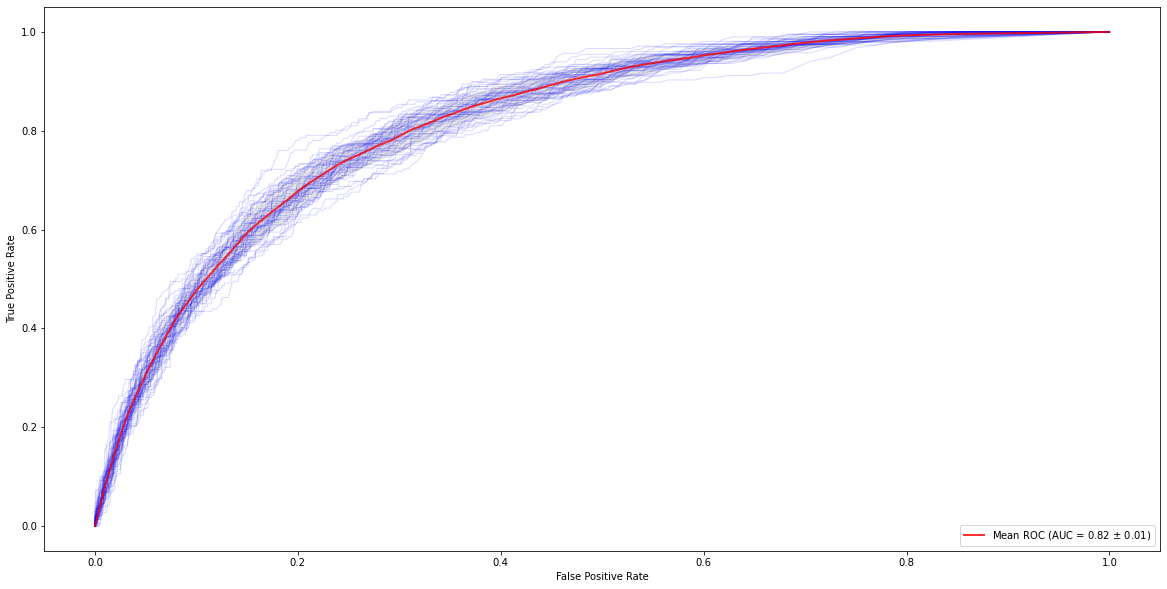

In [14]:
# #- create plot instance
fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

#- go through all n model executions
for n in range(config.getint('settings', 'n_runs')):
    
    if config.getboolean('general', 'verbose'):
        print('INFO: run {} of {}'.format(n+1, config.getint('settings', 'n_runs')))

    #- run machine learning model and return outputs
    X_df, y_df, eval_dict = pipeline.run_reference(X, Y, config, scaler, clf, out_dir)
    
    #- select sub-dataset with only datapoints with observed conflicts
    X1_df, y1_df = utils.get_conflict_datapoints_only(X_df, y_df)
    
    #- append per model execution
    out_X_df = evaluation.fill_out_df(out_X_df, X_df)
    out_y_df = evaluation.fill_out_df(out_y_df, y_df)
    out_dict = evaluation.fill_out_dict(out_dict, eval_dict)

    #- plot ROC curve per model execution
    tprs, aucs = plots.plot_ROC_curve_n_times(ax1, clf, X_df.to_numpy(), y_df.y_test.to_list(),
                                                                  trps, aucs, mean_fpr)

#- plot mean ROC curve
plots.plot_ROC_curve_n_mean(ax1, tprs, aucs, mean_fpr)

## Model evaluation

### For all data points

During the model runs, the computed model evaluation scores per model execution were stored to a dictionary. Currently, the evaluation scores used are:

* [**Accuracy**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): the fraction of correct predictions;
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): the ratio *tp / (tp + fp)* where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative;
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): the ratio *tp / (tp + fn)* where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples;
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0;
* [**Cohen-Kappa score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html): is used to measure inter-rater reliability. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.
* [**Brier score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html): the smaller the Brier score, the better, hence the naming with “loss”. The lower the Brier score is for a set of predictions, the better the predictions are calibrated. Note that the Brier loss score is relatively sensitive for imbalanced datasets;
* [**ROC score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html): a value of 0.5 suggests no skill, e.g. a curve along the diagonal, whereas a value of 1.0 suggests perfect skill, all points along the left y-axis and top x-axis toward the top left corner. A value of 0.0 suggests perfectly incorrect predictions. Note that the ROC score is relatively insensitive for imbalanced datasets.

Let's check the mean scores over all runs:

In [15]:
for key in out_dict:
    
    print('average {0} of run with {1} repetitions is {2:0.3f}'.format(key, config.getint('settings', 'n_runs'), np.mean(out_dict[key])))

average Accuracy of run with 50 repetitions is 0.846
average Precision of run with 50 repetitions is 0.555
average Recall of run with 50 repetitions is 0.264
average F1 score of run with 50 repetitions is 0.356
average Cohen-Kappa score of run with 50 repetitions is 0.282
average Brier loss score of run with 50 repetitions is 0.110
average ROC AUC score of run with 50 repetitions is 0.822


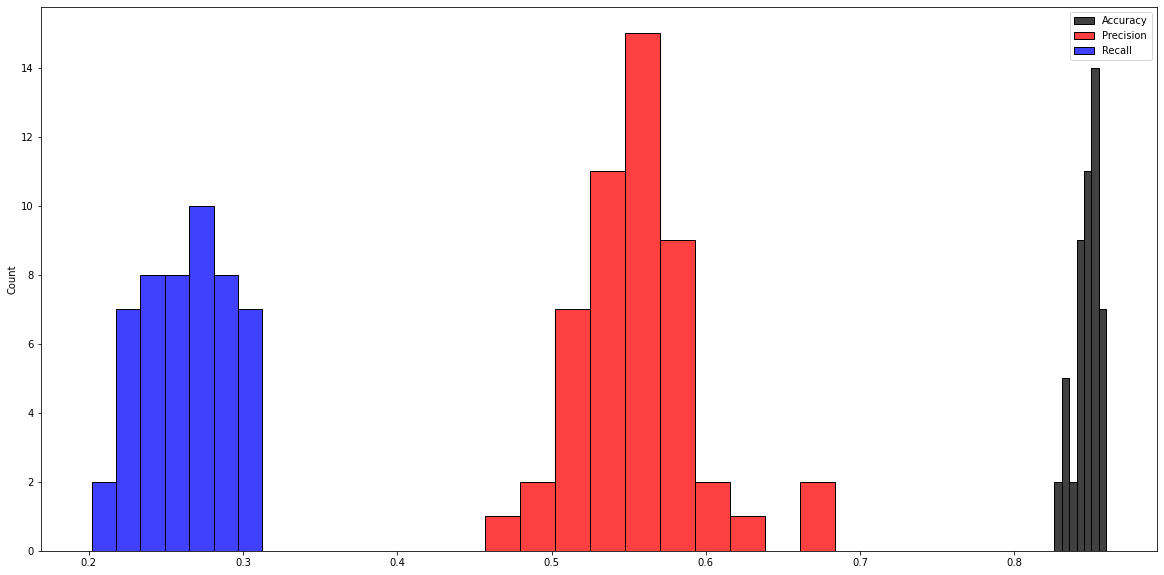

In [16]:
plots.metrics_distribution(out_dict, figsize=(20, 10));

Based on all data points, the [**confusion matrix**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) can be plotted. This is a relatively straightforward way to visualize how good the classifier values are predicted by the model.

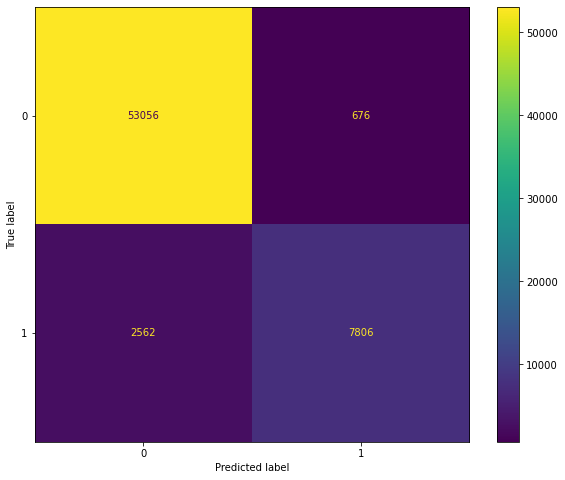

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
metrics.plot_confusion_matrix(clf, out_X_df.to_numpy(), out_y_df.y_test.to_list(), ax=ax);

### Per unique polygon

Thus far, we merely looked at numerical scores. This of course tells us a lot about the quality of the machine-learning model and its predictions, but not so much about how this looks like spatially. We therefore combine the observations and predictions made with the associated polygons based on a 'global' dataframe functioning as a look-up table. By this means, each model output can be connected to its polygon using a unique ID.

In [18]:
df_hit, gdf_hit = evaluation.polygon_model_accuracy(out_y_df, global_df, out_dir=None)

First, let's have a look at how often each polygon occurs in the all test samples, i.e. those obtained by appending the test samples per model execution. Besides, the overall relative distribution is visualized.

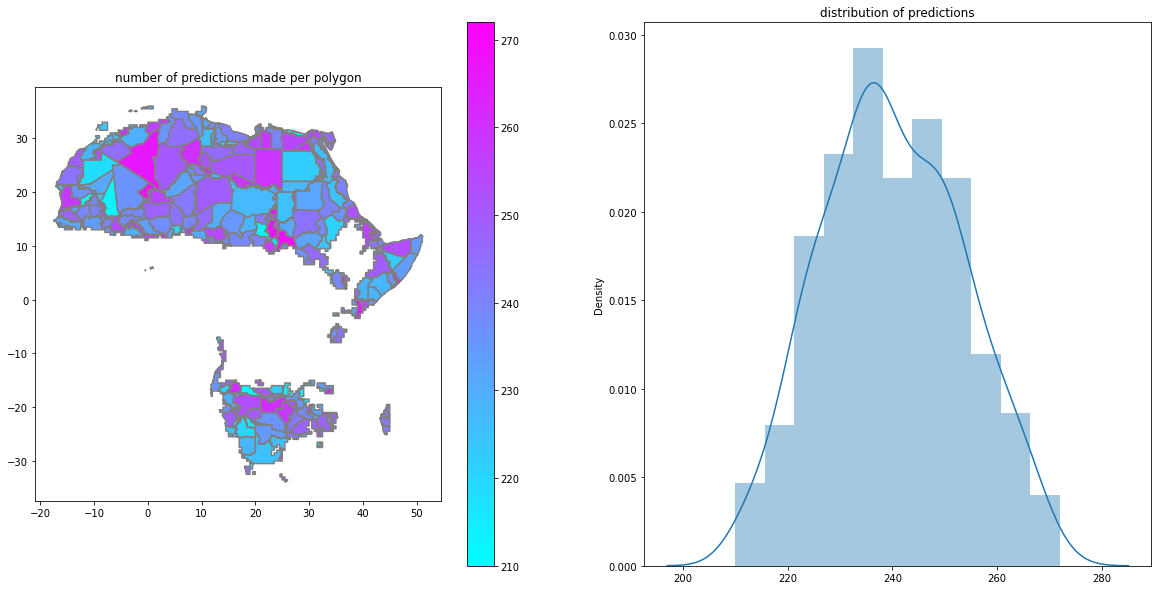

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_hit.plot(ax=ax1, column='ID_count', legend=True, cmap='cool')
selected_polygons_gdf.boundary.plot(ax=ax1, color='0.5')
ax1.set_title('number of predictions made per polygon')
sbs.distplot(df_hit.ID_count.values, ax=ax2)
ax2.set_title('distribution of predictions');

By repeating the model n times, the aim is to represent all polygons in the resulting test sample. The fraction is computed below. 

Note that is should be close to 100 % but may be slightly less. This can happen if input variables have no data for one polygon, leading to a removal of those polygons from the analysis. Or because some polygons and input data may not overlap.

In [20]:
print('{0:0.2f} % of all active polygons are considered in test sample'.format(len(gdf_hit)/len(selected_polygons_gdf)*100))

97.45 % of all active polygons are considered in test sample


By aggregating results per polygon, we can now assess model output spatially. Three main aspects are presented here:

1. The chance of a correct prediction, defined as the ratio of number of correct predictions made to overall number of predictions made;
2. The total number of conflicts in the test data;
3. The chance of conflict, defined as the ration of number of conflict predictions to overall number of predictions made.

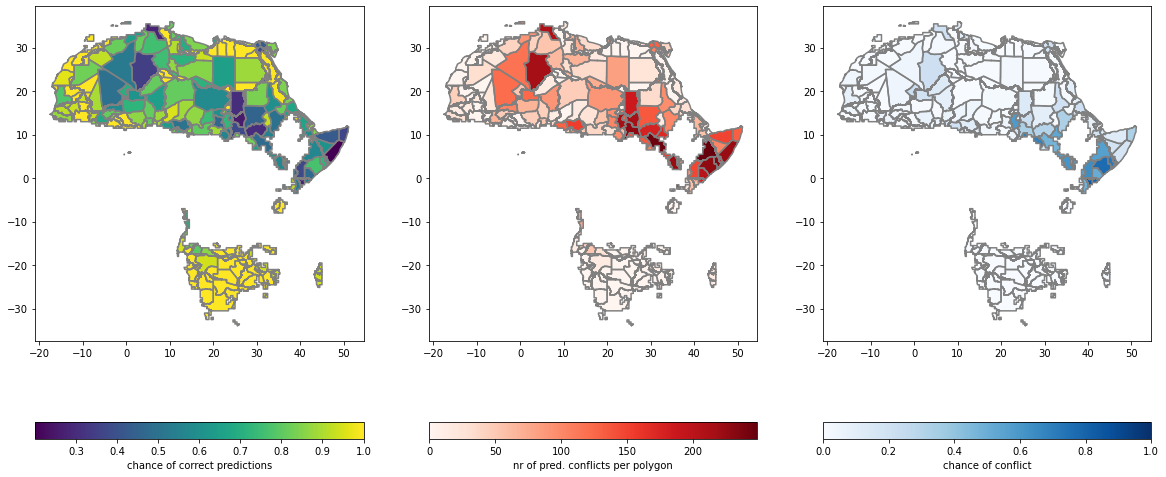

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
gdf_hit.plot(ax=ax1, column='chance_correct_pred', legend=True, 
             legend_kwds={'label': "chance of correct predictions", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax1, color='0.5')
gdf_hit.plot(ax=ax2, column='nr_test_confl', legend=True, cmap='Reds', 
             legend_kwds={'label': "nr of pred. conflicts per polygon", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax2, color='0.5')
gdf_hit.plot(ax=ax3, column='chance_correct_confl_pred', legend=True, cmap='Blues', vmin=0, vmax=1, 
             legend_kwds={'label': "chance of conflict", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax3, color='0.5');

To get the variation of CCP (chance of corret prediction) per polygon, we split up the entire output data in 10 parts and calcualte mean, median, and standard deviation of CCP.

In [22]:
gdf_CCP = evaluation.calc_kFold_polygon_analysis(out_y_df, global_df, out_dir=None)

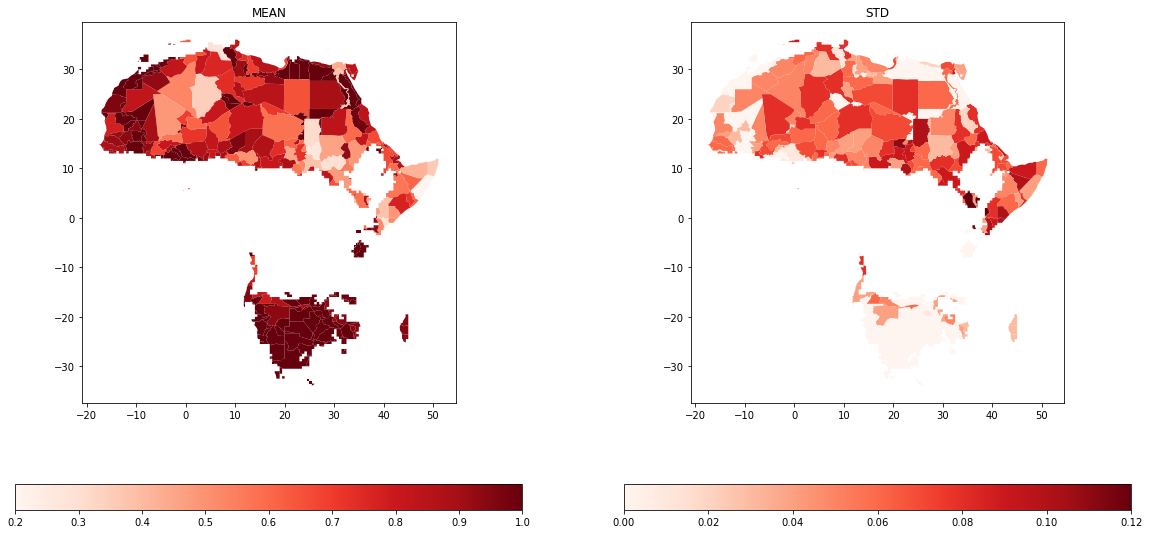

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_CCP.plot(column='mean_CCP', ax=ax1, cmap='Reds', legend=True, legend_kwds={'orientation': "horizontal"})
ax1.set_title('MEAN')
gdf_CCP.plot(column='std_CCP', ax=ax2, cmap='Reds', legend=True, legend_kwds={'orientation': "horizontal"})
ax2.set_title('STD');

To understand to what extent the model accuracy (i.e. hits) may depend on the number of predictions made per polygon or other factors, we plot some simple scatter plots.

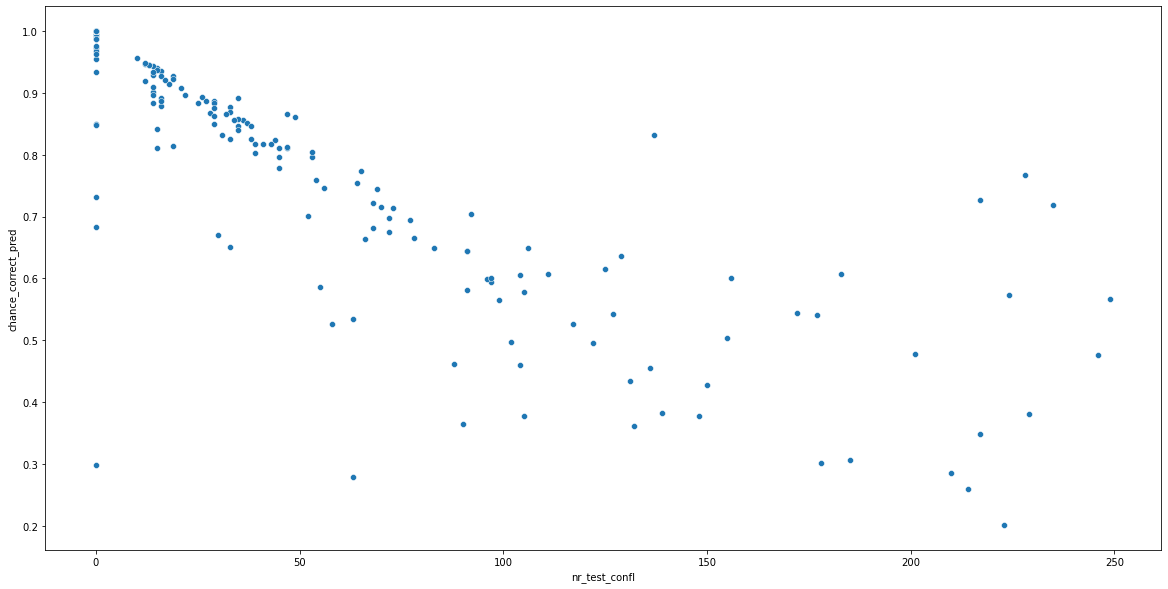

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sbs.scatterplot(data=df_hit, x='nr_test_confl', y='chance_correct_pred', ax=ax)

Up to know, we looked at two or more indicators of how the model performed and other statistical analyses per polygon. It's now time to come up with an indicator for which polygons we 'trust' the model.

Thus, we compute the median of the average hit accuracy of all polygons. This allows for dividing the polygons in the 50 % with an average hit accuracy above the median, and the other 50 % below it. These are our main categories:

* 'H': upper 50 % of average hit accuracy;
* 'L': lower 50 % of average hit accuracy.

In addition, we may want to know how this categorization depends on the number of conflicts in a polygon. For example, wich polygons have a high accuracy with lots of conflicts? For these polygons, we could assume that the model robustly succeeds in predicting conflict. To that end, we also compute the median number of conflicts per polygon.

This yields four sub-categories:

* 'HH': upper 50 % of average hit accuracy and upper 50 % of number of conflicts;
* 'HL': upper 50 % of average hit accuracy, but then with lower 50 % of number of conflicts;
* 'LH': lower 50 % of average hit accuracy and upper 50 % of number of conflicts;
* 'LL': lower 50 % of average hit accuracy, but then with lower 50 % of number of conflicts.

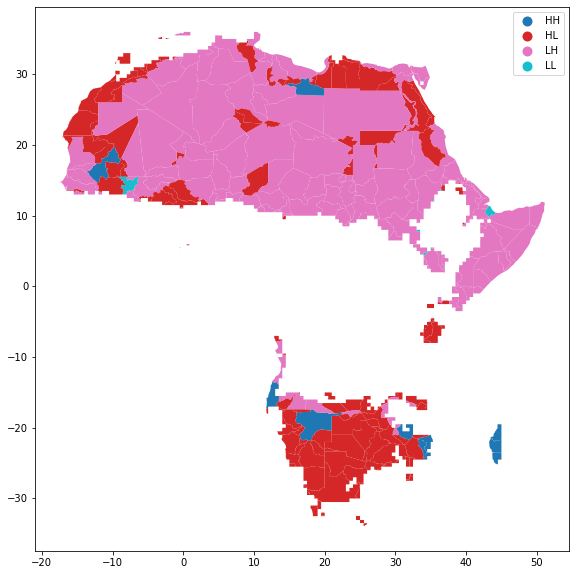

In [25]:
plots.polygon_categorization(gdf_hit, category='sub', figsize=(20, 10), legend=True);

## Preparing for the future

In this notebook, we have trained and tested our model with various combinations of data. Subsequently, the average performance of the model was evaluated with a range of metrics.

If we want to re-use our model for the future and want to make predictions, it is necessary to save the model (that is, the classifier). It can then be loaded and prediction can be made with other variable values than those used for this reference run.

In [26]:
clf = machine_learning.pickle_clf(scaler, clf, config)

INFO: fitting the classifier with all data from reference period
DEBUG: loading XY data from C:\Users\hoch0001\Documents\_code\copro\example\OUT\XY.npy
DEBUG: number of data points including missing values: 4384
DEBUG: number of data points excluding missing values: 4272
DEBUG: a fraction of 15.94 percent in the data corresponds to conflicts.
INFO: dumping classifier to ../example/OUT\clf.pkl


With that, we can also determine the relative importance of each feature based on all data.

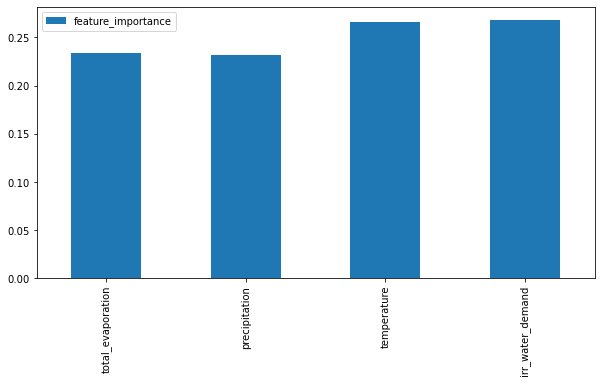

In [27]:
plots.factor_importance(clf, config, out_dir, figsize=(10, 5));